In [2]:
import pandas as pd

# Load the latest CSV file
file_path = 'FinalOutput.csv'  # Replace with the actual path to the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Display basic information about the dataframe
print(data.info())

# Display summary statistics for the numerical columns
print(data.describe())


             channel_id                              channel_link  \
0   @answeredthatforyou   https://youtube.com/@answeredthatforyou   
1        @nickandcarrie        https://youtube.com/@nickandcarrie   
2  @4nonblondesofficial  https://youtube.com/@4nonblondesofficial   
3       @jasminandjames       https://youtube.com/@jasminandjames   
4          @mavigadgets          https://youtube.com/@mavigadgets   

            channel_name   channel_type country country_rank    created_date  \
0  Answered That For You  entertainment      US        729th   Jan 4th, 2023   
1          NickandCarrie         people      AU         23rd   Jul 2nd, 2019   
2          4 Non Blondes            NaN      US        960th   Feb 2nd, 2023   
3       Jasmin and James  entertainment      AU        133rd  Sep 12th, 2021   
4             MaviGadget  entertainment      US         66th  Nov 19th, 2017   

  daily_subs_average daily_views_average estimated_monthly_income  ...  \
0             +8.33K          

In [7]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'FinalOutput.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Handle missing values
data.fillna('N/A', inplace=True)

# Function to clean income data and convert to numerical values
def clean_income(income_str):
    if income_str == 'N/A' or pd.isna(income_str):
        return np.nan
    income_str = str(income_str).replace('€', '').replace('$', '').replace('K', 'e3').replace('M', 'e6').replace('B', 'e9').replace(' ', '').replace(',', '')
    try:
        # Handle ranges by taking the average
        if '-' in income_str:
            low, high = income_str.split('-')
            return (float(eval(low.strip())) + float(eval(high.strip()))) / 2
        else:
            return float(eval(income_str))
    except:
        return np.nan

# Clean and convert 'estimated_monthly_income' and 'yearly_income'
data['estimated_monthly_income'] = data['estimated_monthly_income'].apply(clean_income)
data['yearly_income'] = data['yearly_income'].apply(clean_income)

# Convert 'subscribers', 'views_last_30_days', and 'daily_subs_average' to numeric values
def clean_numeric(value):
    if value == 'N/A' or pd.isna(value):
        return np.nan
    value = str(value).replace('K', 'e3').replace('M', 'e6').replace('B', 'e9').replace(',', '').replace('+', '')
    try:
        return float(eval(value))
    except:
        return np.nan

data['subscribers'] = data['subscribers'].apply(clean_numeric)
data['views_last_30_days'] = data['views_last_30_days'].apply(clean_numeric)
data['daily_subs_average'] = data['daily_subs_average'].apply(clean_numeric)
data['daily_views_average'] = data['daily_views_average'].apply(clean_numeric)

# Convert 'uploads' and 'views' to numeric types if necessary
data['uploads'] = pd.to_numeric(data['uploads'], errors='coerce')
data['views'] = pd.to_numeric(data['views'], errors='coerce')

# Drop the column 'Unnamed: 21' as it is not used
data.drop(columns=['Unnamed: 21'], inplace=True)

# Verify the cleaned data
print(data.head())
print(data.info())
print(data.describe())

# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_output.csv'  # Replace with the desired path for the cleaned data
data.to_csv(cleaned_file_path, index=False)


             channel_id                              channel_link  \
0   @answeredthatforyou   https://youtube.com/@answeredthatforyou   
1        @nickandcarrie        https://youtube.com/@nickandcarrie   
2  @4nonblondesofficial  https://youtube.com/@4nonblondesofficial   
3       @jasminandjames       https://youtube.com/@jasminandjames   
4          @mavigadgets          https://youtube.com/@mavigadgets   

            channel_name   channel_type country country_rank    created_date  \
0  Answered That For You  entertainment      US        729th   Jan 4th, 2023   
1          NickandCarrie         people      AU         23rd   Jul 2nd, 2019   
2          4 Non Blondes            N/A      US        960th   Feb 2nd, 2023   
3       Jasmin and James  entertainment      AU        133rd  Sep 12th, 2021   
4             MaviGadget  entertainment      US         66th  Nov 19th, 2017   

   daily_subs_average  daily_views_average  estimated_monthly_income  ...  \
0              8330.0      

C:\Users\Reza\AppData\Local\Temp\ipykernel_23360\69602278.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('N/A', inplace=True)


In [9]:
# Identify outliers using z-score
from scipy import stats

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)[0]

# Handle zero values
def handle_zero_values(data):
    # Replace zero values with NaN
    data[data == 0] = np.nan
    # Impute NaN values
    # For example, replace NaN values with the median
    median = np.nanmedian(data)
    data.fillna(median, inplace=True)
    return data

# Before outlier detection and handling
print("Before Outlier Detection and Handling:")
print("=====================================")
print("Monthly Income Statistics:")
print(data['estimated_monthly_income'].describe())
print("\nYearly Income Statistics:")
print(data['yearly_income'].describe())

# Apply outlier detection and handling for 'estimated_monthly_income'
outliers_monthly_income = detect_outliers_zscore(data['estimated_monthly_income'])
data['estimated_monthly_income'] = handle_zero_values(data['estimated_monthly_income'])

# Apply outlier detection and handling for 'yearly_income'
outliers_yearly_income = detect_outliers_zscore(data['yearly_income'])
data['yearly_income'] = handle_zero_values(data['yearly_income'])

# After outlier detection and handling
print("\nAfter Outlier Detection and Handling:")
print("=====================================")
print("Monthly Income Statistics:")
print(data['estimated_monthly_income'].describe())
print("\nYearly Income Statistics:")
print(data['yearly_income'].describe())




# 
# data['subscribers_zscore'] = zscore(data['subscribers'])
# outliers = data[(data['subscribers_zscore'] > 3) | (data['subscribers_zscore'] < -3)]
# 
# print("Outliers:")
# print(outliers[['channel_name', 'created_date', 'subscribers']])
# 
# # Outlier Handling (Replace with NaN)
# data.loc[(data['subscribers_zscore'] > 3) | (data['subscribers_zscore'] < -3), 'subscribers'] = np.nan
# 
# # Print the modified dataset
# print(data.head())


Before Outlier Detection and Handling:
Monthly Income Statistics:
count    2.343000e+03
mean     2.301230e+05
std      4.575564e+05
min      1.300000e-01
25%      1.307500e+04
50%      7.020000e+04
75%      2.177500e+05
max      6.426800e+06
Name: estimated_monthly_income, dtype: float64

Yearly Income Statistics:
count    2.343000e+03
mean     2.760782e+06
std      5.489822e+06
min      1.590000e+00
25%      1.572500e+05
50%      8.495500e+05
75%      2.603725e+06
max      7.685000e+07
Name: yearly_income, dtype: float64

After Outlier Detection and Handling:
Monthly Income Statistics:
count    2.343000e+03
mean     2.301230e+05
std      4.575564e+05
min      1.300000e-01
25%      1.307500e+04
50%      7.020000e+04
75%      2.177500e+05
max      6.426800e+06
Name: estimated_monthly_income, dtype: float64

Yearly Income Statistics:
count    2.343000e+03
mean     2.760782e+06
std      5.489822e+06
min      1.590000e+00
25%      1.572500e+05
50%      8.495500e+05
75%      2.603725e+06
ma

C:\Users\Reza\AppData\Local\Temp\ipykernel_23360\2927818262.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == 0] = np.nan
C:\Users\Reza\AppData\Local\Temp\ipykernel_23360\2927818262.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == 0] = np.nan


## EDA Phase

### Initial Inspection

In [1]:
import pandas as pd

# Load the cleaned dataset
cleaned_data = 'cleaned_output.csv'  # Replace with the actual path
data_cleaned = pd.read_csv(cleaned_data)

# Display the first few rows of the cleaned dataframe
print(data_cleaned.head())

# Display basic information about the dataframe
print(data_cleaned.info())

# Display summary statistics for the numerical columns
print(data_cleaned.describe())


             channel_id                              channel_link  \
0   @answeredthatforyou   https://youtube.com/@answeredthatforyou   
1        @nickandcarrie        https://youtube.com/@nickandcarrie   
2  @4nonblondesofficial  https://youtube.com/@4nonblondesofficial   
3       @jasminandjames       https://youtube.com/@jasminandjames   
4          @mavigadgets          https://youtube.com/@mavigadgets   

            channel_name   channel_type country country_rank    created_date  \
0  Answered That For You  entertainment      US        729th   Jan 4th, 2023   
1          NickandCarrie         people      AU         23rd   Jul 2nd, 2019   
2          4 Non Blondes            NaN      US        960th   Feb 2nd, 2023   
3       Jasmin and James  entertainment      AU        133rd  Sep 12th, 2021   
4             MaviGadget  entertainment      US         66th  Nov 19th, 2017   

   daily_subs_average  daily_views_average  estimated_monthly_income  ...  \
0              8330.0      

### Distribution Analysis

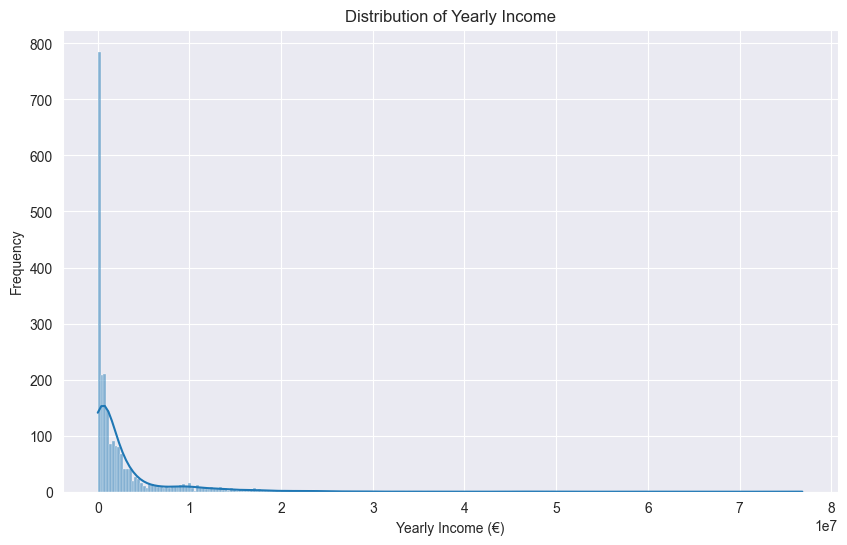

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of yearly income
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['yearly_income'], bins=250, kde=True)
plt.title('Distribution of Yearly Income')
plt.xlabel('Yearly Income (€)')
plt.ylabel('Frequency')
plt.show()


### Correlation Analysis

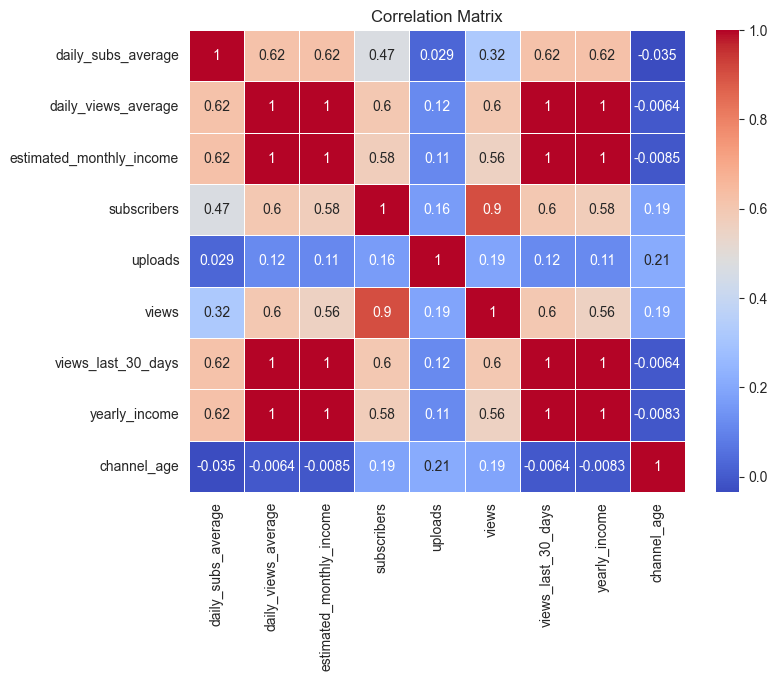

In [21]:
# Select only numerical columns for correlation analysis
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Country-wise Analysis

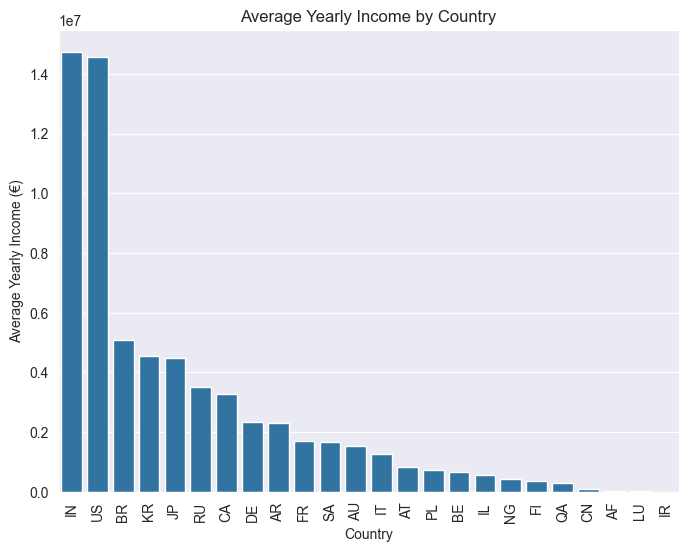

In [20]:
# Plot the average yearly income by country
plt.figure(figsize=(8, 6))
avg_yearly_income_by_country = data_cleaned.groupby('country')['yearly_income'].mean().sort_values(ascending=False)
sns.barplot(x=avg_yearly_income_by_country.index, y=avg_yearly_income_by_country.values)
plt.title('Average Yearly Income by Country')
plt.xlabel('Country')
plt.ylabel('Average Yearly Income (€)')
plt.xticks(rotation=90)
plt.show()

### Countries Distribution

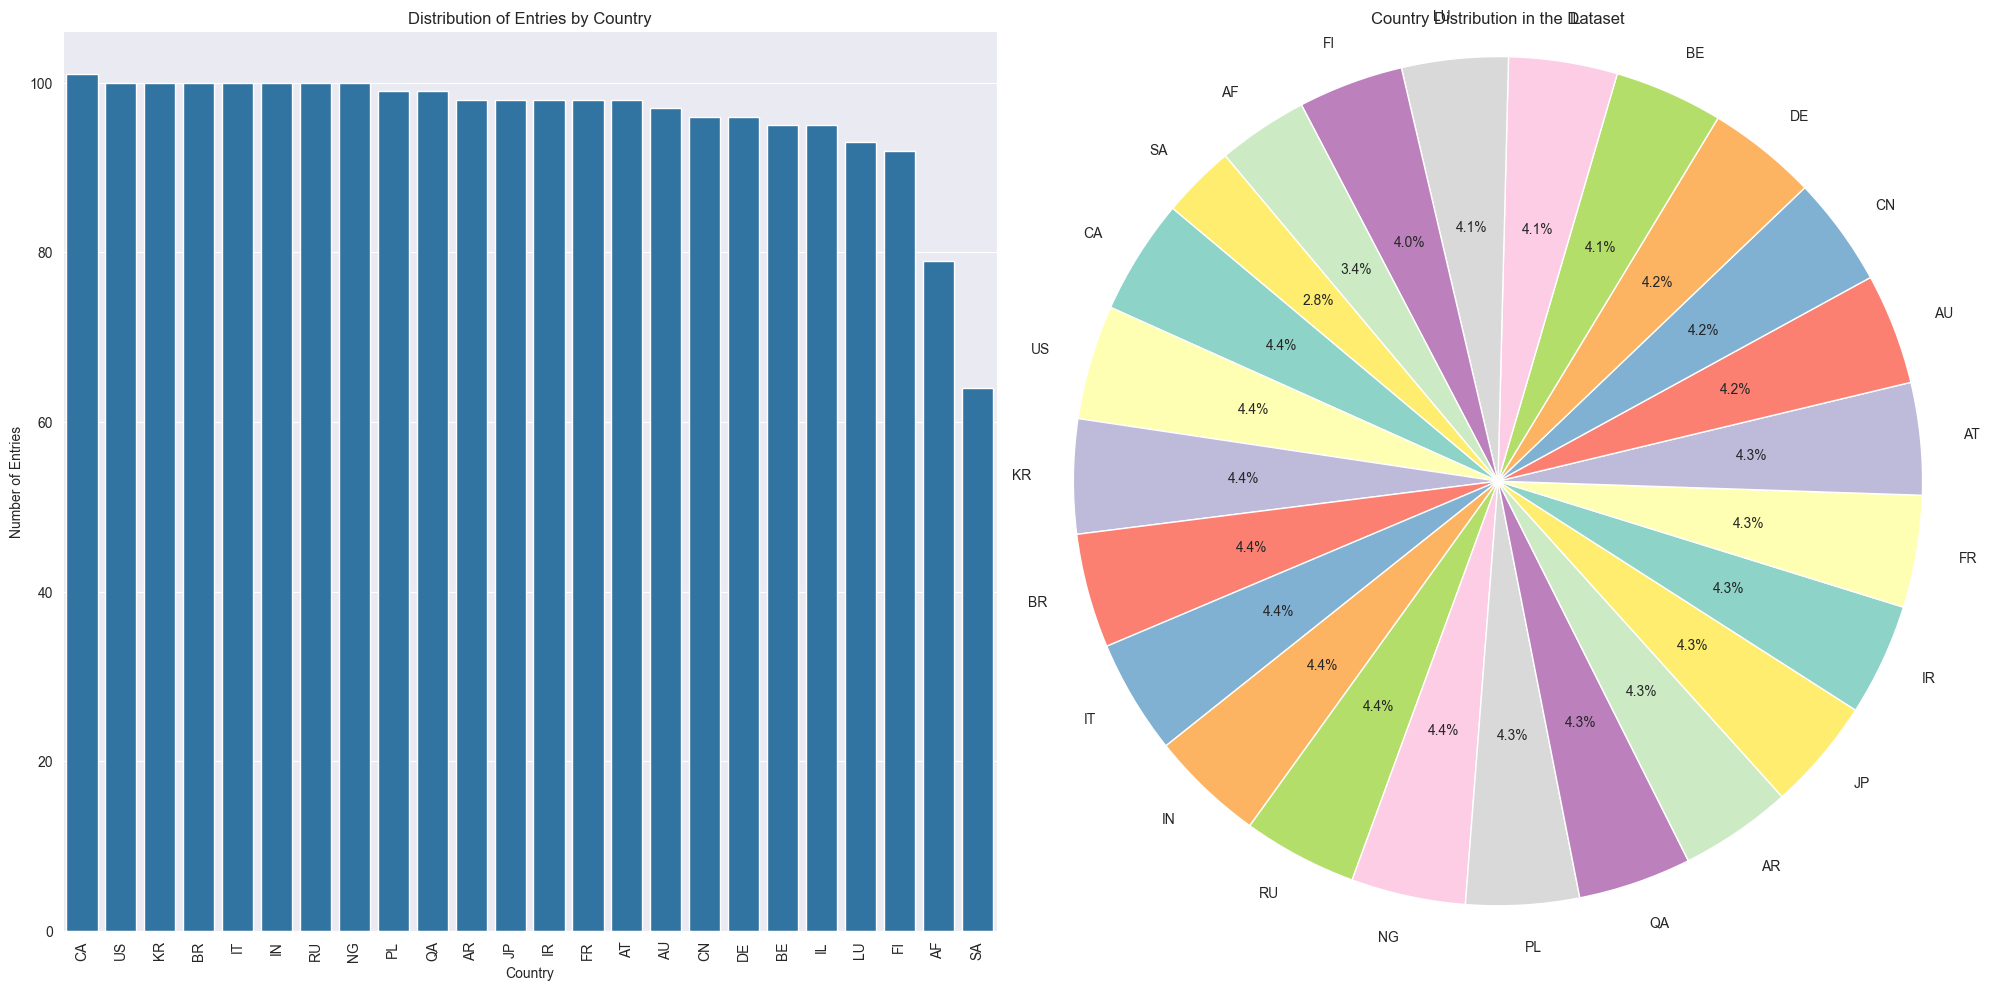

In [17]:
# Count the number of entries per country
country_counts = data_cleaned['country'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the country distribution
sns.barplot(x=country_counts.index, y=country_counts.values, ax=axes[0])
axes[0].set_title('Distribution of Entries by Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Entries')
axes[0].tick_params(axis='x', rotation=90)


# Display the country distribution as a pie chart
axes[1].pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
axes[1].set_title('Country Distribution in the Dataset')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

### Distribution of Channels by Channel Type

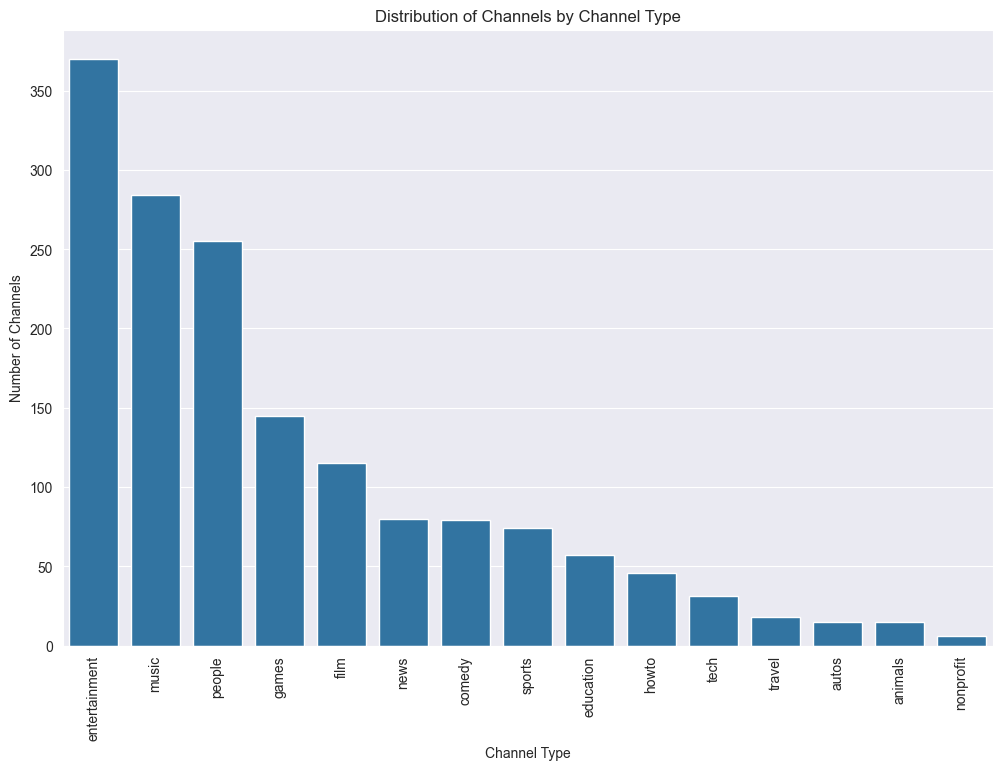

In [12]:
channel_type_counts = data_cleaned['channel_type'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=channel_type_counts.index, y=channel_type_counts.values)
plt.title('Distribution of Channels by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Number of Channels')
plt.xticks(rotation=90)
plt.show()

### Incomes of Different Channel Types

<Figure size 1200x800 with 0 Axes>

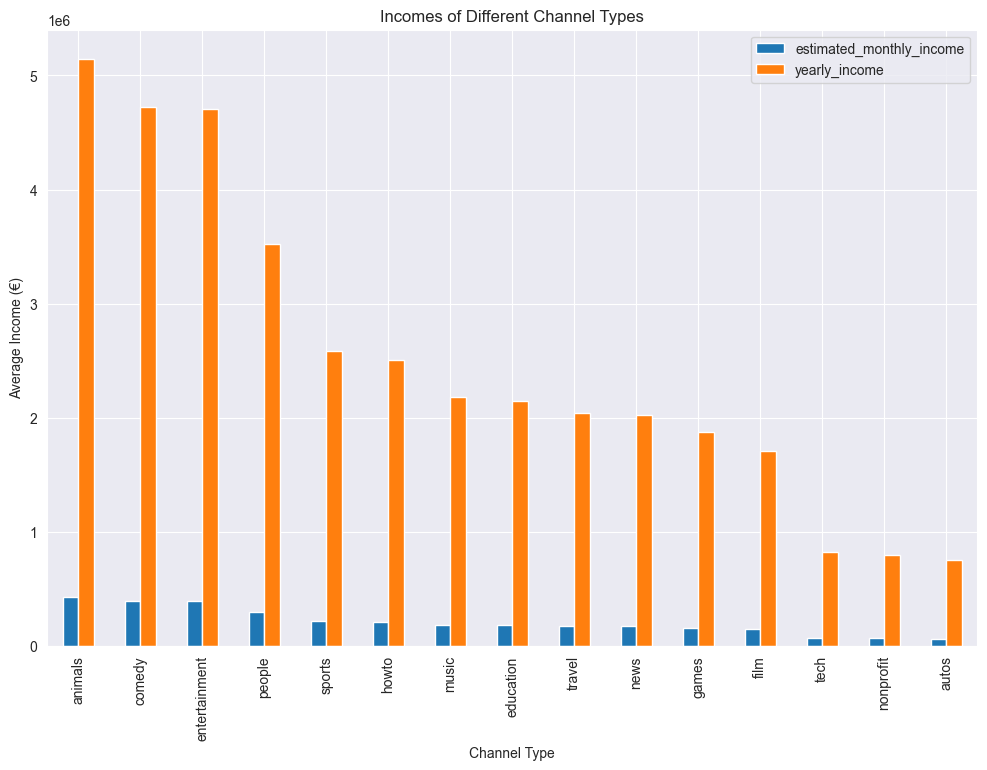

In [13]:
channel_type_incomes = data_cleaned.groupby('channel_type').agg({
    'estimated_monthly_income': 'mean',
    'yearly_income': 'mean'
}).sort_values(by='yearly_income', ascending=False)

plt.figure(figsize=(12, 8))
channel_type_incomes.plot(kind='bar', figsize=(12, 8))
plt.title('Incomes of Different Channel Types')
plt.xlabel('Channel Type')
plt.ylabel('Average Income (€)')
plt.xticks(rotation=90)
plt.show()

### Convert the created date to how old the channels are

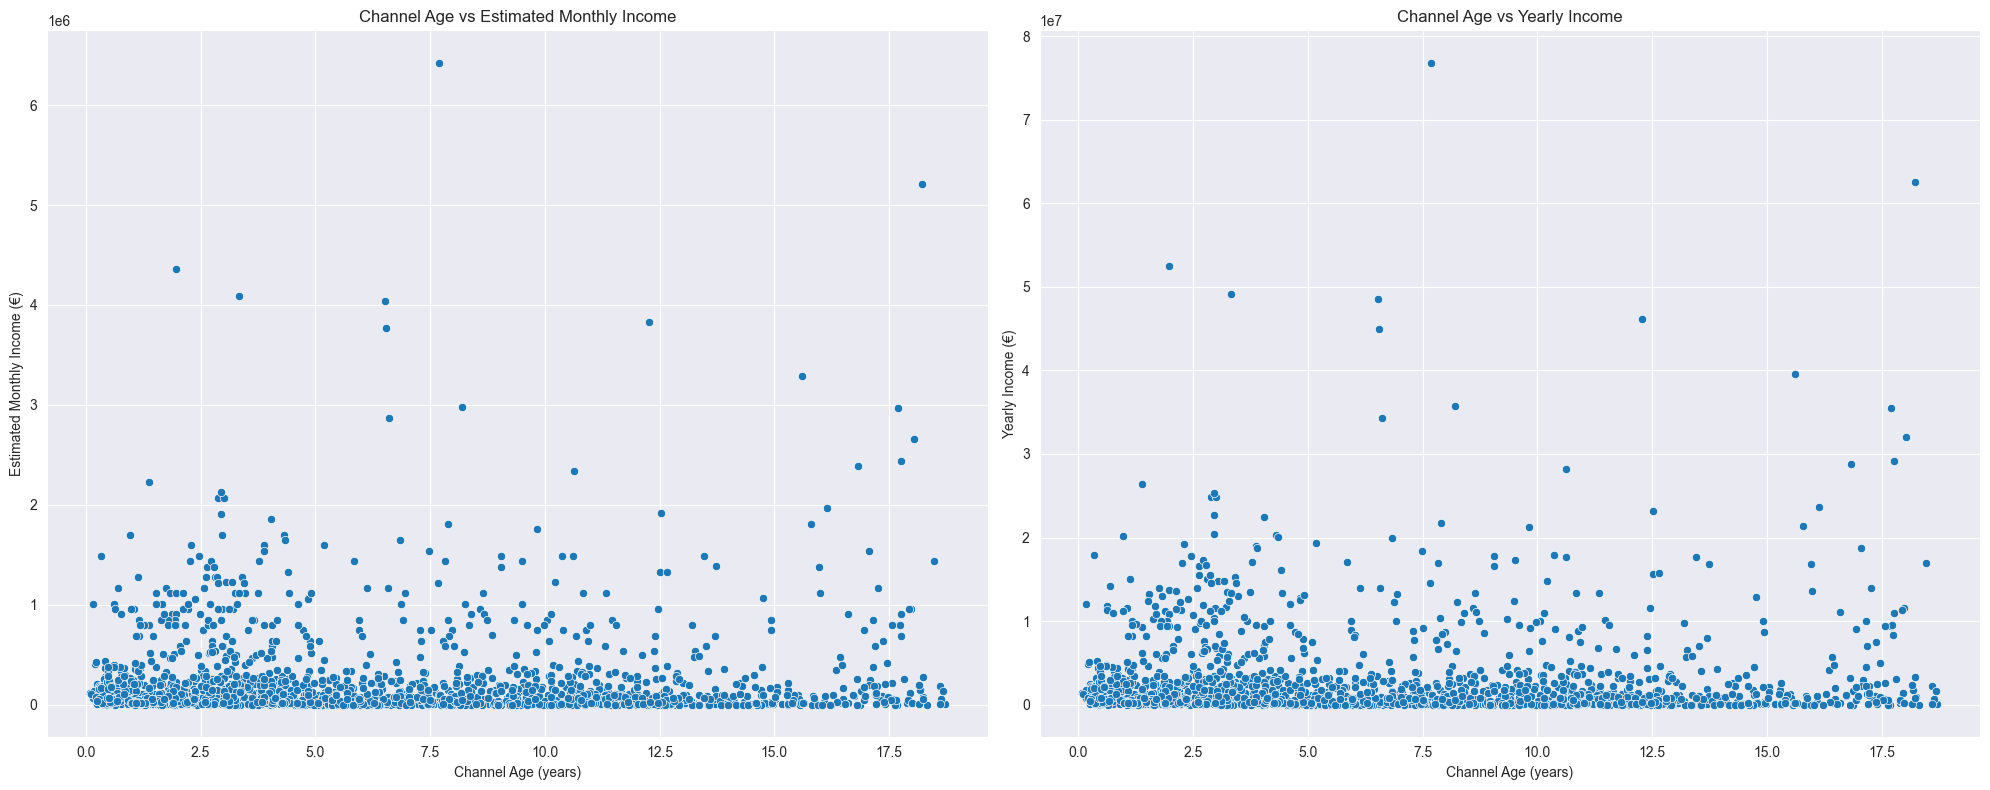

In [16]:
from datetime import datetime
import numpy as np

def calculate_channel_age(created_date):
    if created_date == 'N/A' or pd.isna(created_date):
        return np.nan
    try:
        created_date = datetime.strptime(created_date, '%b %dth, %Y')
        age = (datetime.now() - created_date).days / 365
        return age
    except:
        return np.nan

data_cleaned['channel_age'] = data_cleaned['created_date'].apply(calculate_channel_age)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Relationship between the age of the channel and its income
sns.scatterplot(x='channel_age', y='estimated_monthly_income', data=data_cleaned, ax=axes[0])
axes[0].set_title('Channel Age vs Estimated Monthly Income')
axes[0].set_xlabel('Channel Age (years)')
axes[0].set_ylabel('Estimated Monthly Income (€)')

sns.scatterplot(x='channel_age', y='yearly_income', data=data_cleaned, ax=axes[1])
axes[1].set_title('Channel Age vs Yearly Income')
axes[1].set_xlabel('Channel Age (years)')
axes[1].set_ylabel('Yearly Income (€)')

plt.tight_layout()
plt.show()

### relationship between the number of uploads and the income of channels

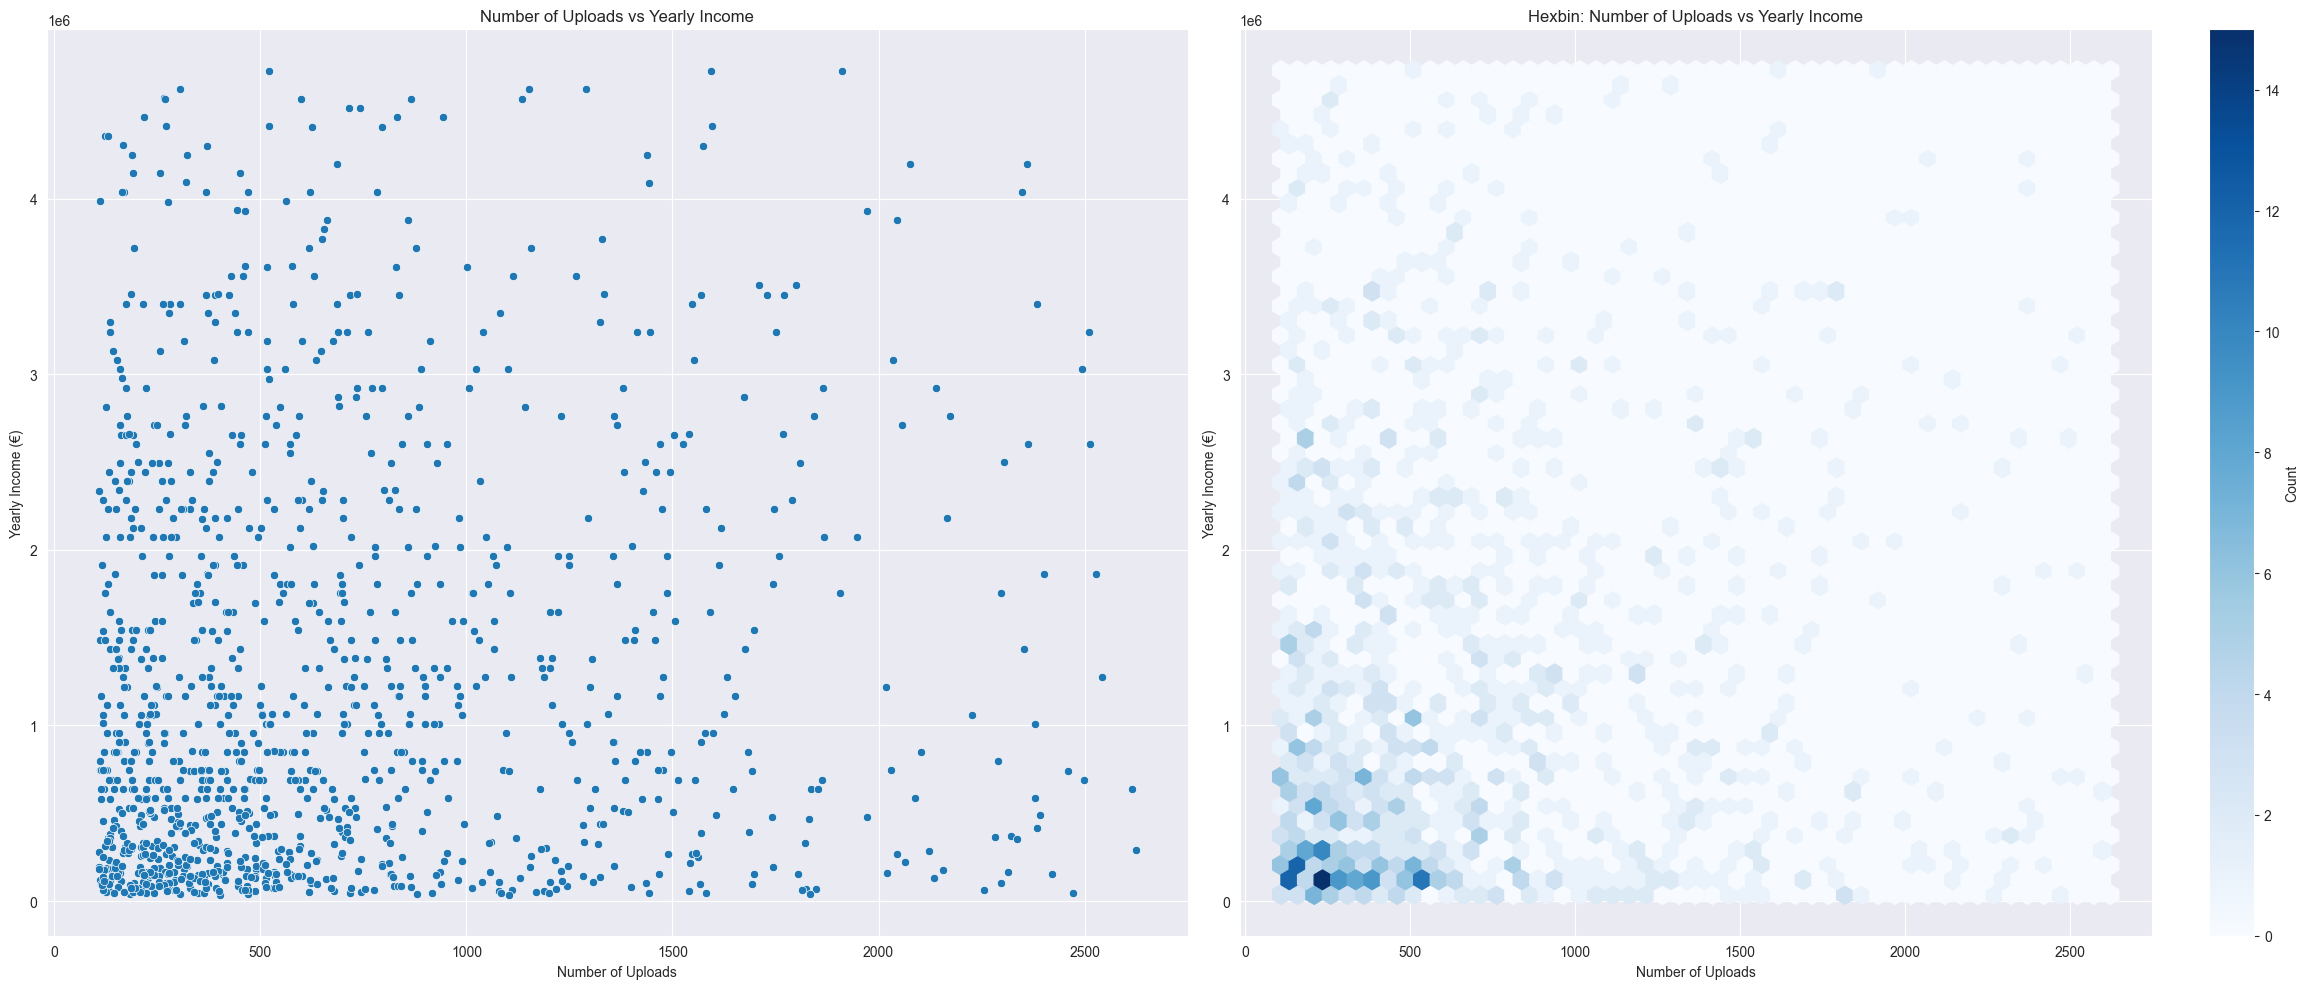

In [28]:
# Handle outliers by filtering out the top and bottom 1% for yearly income and number of uploads
filtered_data = data_cleaned[
    (data_cleaned['yearly_income'] < data_cleaned['yearly_income'].quantile(0.85)) & 
    (data_cleaned['yearly_income'] > data_cleaned['yearly_income'].quantile(0.15)) &
    (data_cleaned['uploads'] < data_cleaned['uploads'].quantile(0.85)) & 
    (data_cleaned['uploads'] > data_cleaned['uploads'].quantile(0.15))
]

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Scatter plot for the number of uploads vs. yearly income
sns.scatterplot(x='uploads', y='yearly_income', data=filtered_data, ax=axes[0])
axes[0].set_title('Number of Uploads vs Yearly Income')
axes[0].set_xlabel('Number of Uploads')
axes[0].set_ylabel('Yearly Income (€)')

# Hexbin plot for the number of uploads vs. yearly income
hb = axes[1].hexbin(filtered_data['uploads'], filtered_data['yearly_income'], gridsize=50, cmap='Blues')
axes[1].set_title('Hexbin: Number of Uploads vs Yearly Income')
axes[1].set_xlabel('Number of Uploads')
axes[1].set_ylabel('Yearly Income (€)')
fig.colorbar(hb, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

### frequency of created channels per year

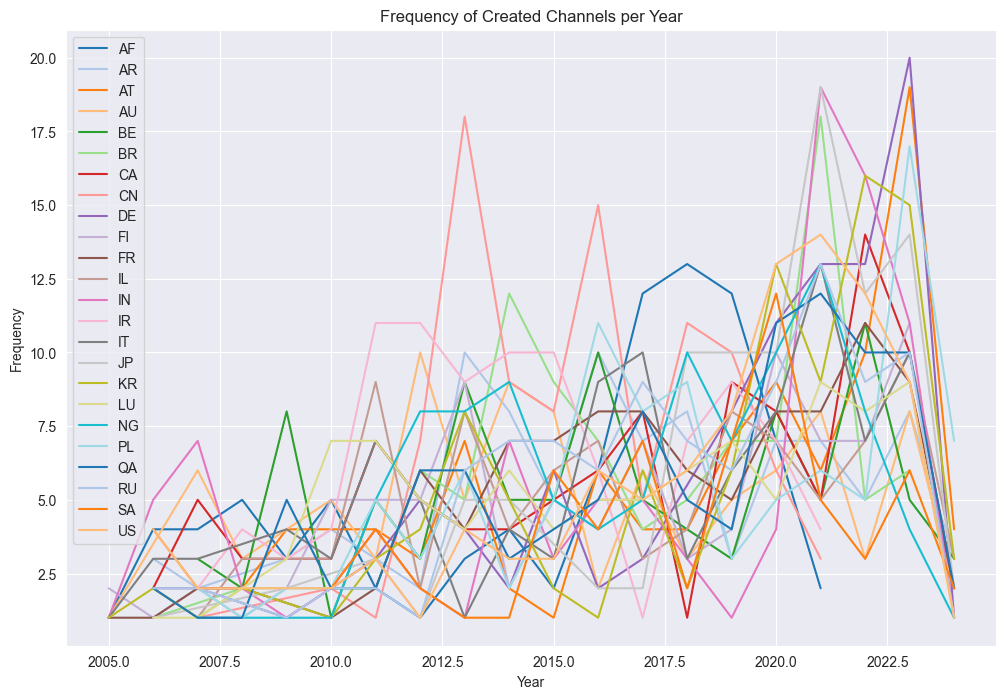

In [35]:
# Extract the year from the 'created_date' column
data_cleaned['year'] = pd.to_datetime(data_cleaned['created_date'], format="mixed").dt.year

# Count the frequency of channels created per year for each country
country_freq = data_cleaned.groupby(['country', 'year']).size().reset_index(name='frequency')

# Get a list of unique countries
countries = country_freq['country'].unique()

# Set up the plot
plt.figure(figsize=(12, 8))

# Assign a color to each country
colors = plt.cm.tab20.colors[:len(countries)]

# Plot a line for each country
for i, country in enumerate(countries):
    data = country_freq[country_freq['country'] == country]
    plt.plot(data['year'], data['frequency'], label=country, color=colors[i % len(colors)])  # Use modulo to handle color index overflow

# Set the plot title and labels
plt.title('Frequency of Created Channels per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

### Relationships of monthly views & different rank with monthly income

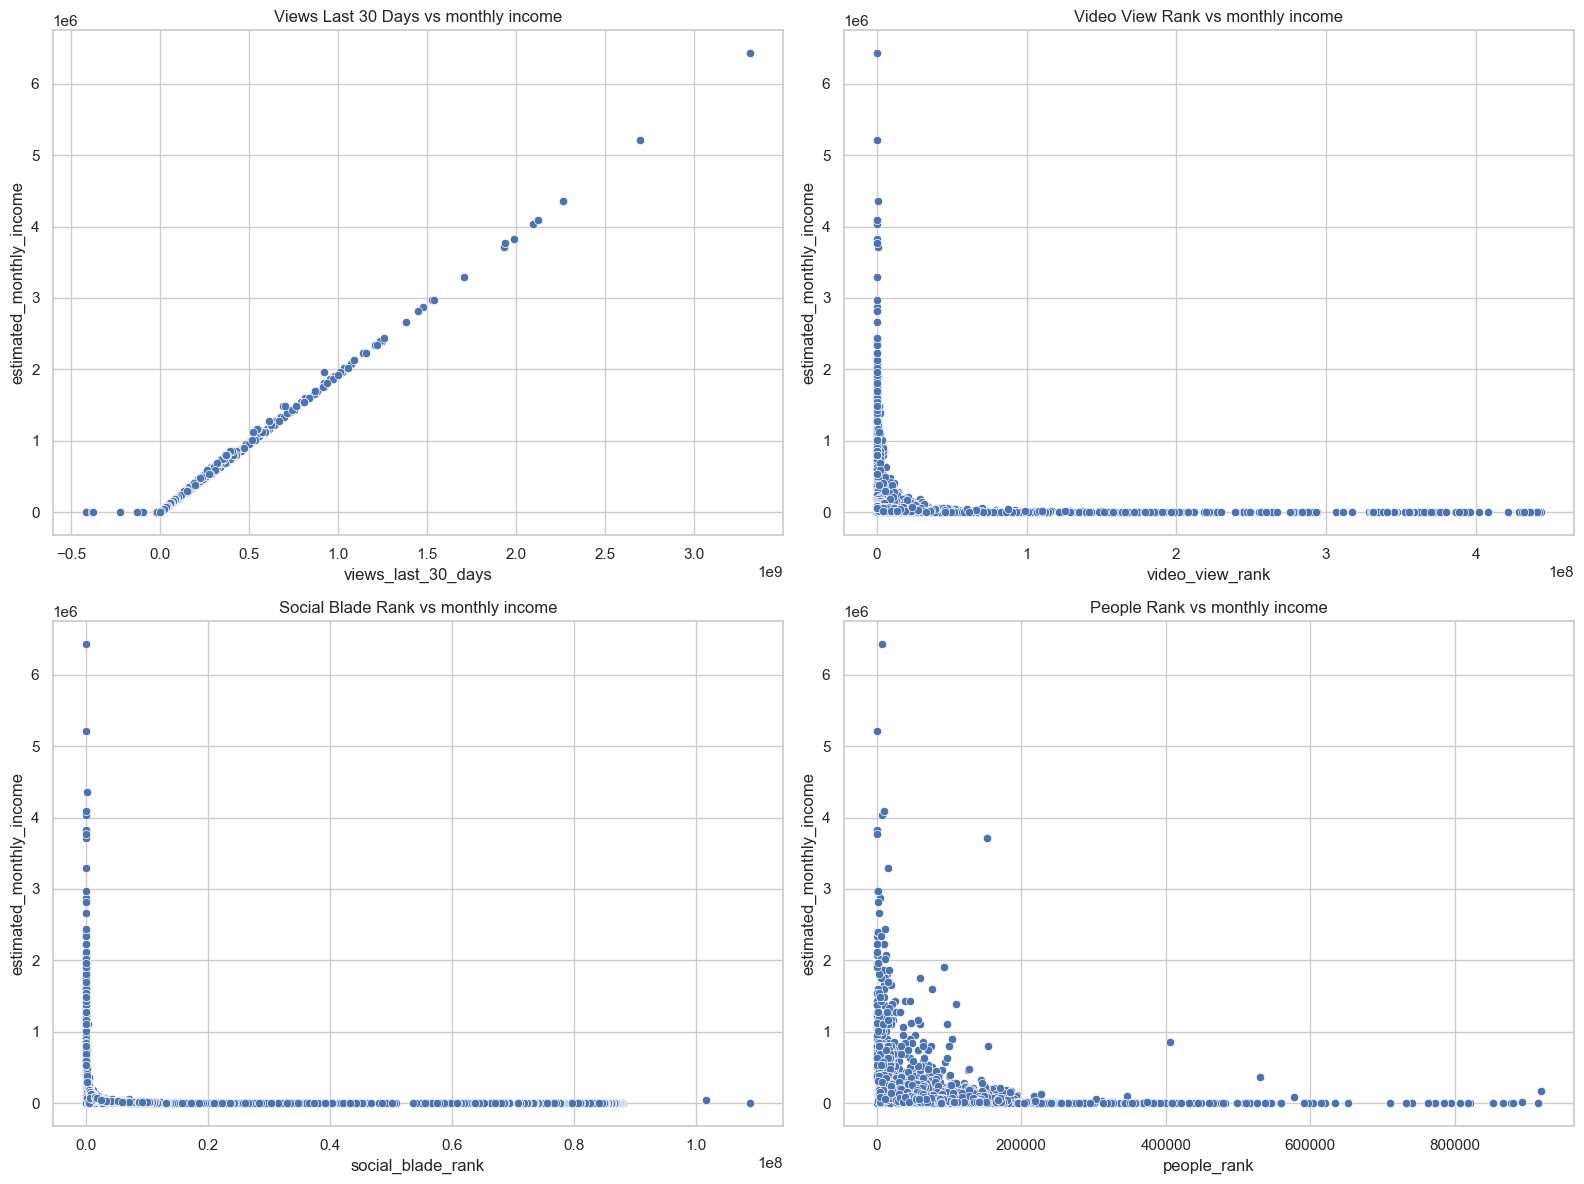

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a function to preprocess rank values
def preprocess_rank(rank):
    try:
        # Remove commas and non-numeric characters, then convert to float
        rank = float(''.join(filter(str.isdigit, str(rank))))
        return rank
    except:
        return float('nan')  # If conversion fails, return NaN

# Apply the preprocessing function to rank columns
rank_columns = ['video_view_rank', 'social_blade_rank', 'people_rank', 'country_rank']
for column in rank_columns:
    data_cleaned[column] = data_cleaned[column].apply(preprocess_rank)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot the relationship between each feature and yearly income
sns.scatterplot(x='views_last_30_days', y='estimated_monthly_income', data=data_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Views Last 30 Days vs monthly income')

sns.scatterplot(x='video_view_rank', y='estimated_monthly_income', data=data_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Video View Rank vs monthly income')

sns.scatterplot(x='social_blade_rank', y='estimated_monthly_income', data=data_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Social Blade Rank vs monthly income')

sns.scatterplot(x='people_rank', y='estimated_monthly_income', data=data_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('People Rank vs monthly income')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()
